This notebook will be used for the Capstone Project


# Introduction/Business Problem

The purpose of this Capstone Project is to identify the venues around the different districts of Hong Kong and determine the venues with the best ratings for tourists. 

When visiting Hong Kong, tourists will want to find a place to stay in a neighborhood with the best venues surrounding them in terms of ratings and price. 

Using the Foursquare API, we will identify which district best suits tourists depending on their preference of restaurants and venues. 

# Data Collection

We will require different sets of data in order to complete this project. 

1. A list of the different districts of Hong Kong 
2. The Longitude and Latitude of these different districts
3. Venue data surrounding these districts using the Foursquare API 


In [1]:
import numpy as np
import pandas as pd

from urllib.request import urlopen
from bs4 import BeautifulSoup

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')


Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    branca-0.4.1               |             py_0          26 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    certifi-2020.4.5.1         |   py36h9f0ad1d_0         151 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    ca-certificates-2020.4.5.1 |       hecc5488_0         146 KB  conda-forge
    altair-4.1.0               |             py_1         614 KB  conda-forge
    ------------------------------------------------------------
                       

In [10]:
#getting the html of our desired url
url = "https://en.wikipedia.org/wiki/Districts_of_Hong_Kong"
html = urlopen(url)

In [13]:
#creating the Beautifulsoup object
soup = BeautifulSoup(html, 'lxml')
type(soup)

bs4.BeautifulSoup

In [14]:
print(soup.prettify())

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   Districts of Hong Kong - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"XsINJApAMNAAA5RKWHMAAACU","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Districts_of_Hong_Kong","wgTitle":"Districts of Hong Kong","wgCurRevisionId":953006501,"wgRevisionId":953006501,"wgArticleId":151994,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Webarchive template wayback links","EngvarB from July 2014","Use dmy dates from July 2014","Articles containing Chinese-language text","P

In [16]:
all_tables=soup.find_all("table")
all_tables
right_table=soup.find('table',class_='wikitable sortable')
right_table

<table class="wikitable sortable">
<tbody><tr>
<th>District
</th>
<th><a href="/wiki/Traditional_Chinese_characters" title="Traditional Chinese characters">Chinese</a>
</th>
<th>Population<sup class="noprint Inline-Template" style="white-space:nowrap;">[<i><a href="/wiki/Wikipedia:Manual_of_Style/Dates_and_numbers#Chronological_items" title="Wikipedia:Manual of Style/Dates and numbers"><span title="The time period mentioned near this tag is ambiguous. (December 2019)">when?</span></a></i>]</sup> <sup class="reference" id="cite_ref-6"><a href="#cite_note-6">[6]</a></sup>
</th>
<th>Area<br/>(km²)
</th>
<th>Density<br/>(/km²)
</th>
<th>Region
</th></tr>
<tr>
<td><a href="/wiki/Central_and_Western_District" title="Central and Western District"><span class="nowrap">Central and Western</span></a></td>
<td><span lang="zh-HK" title="Chinese language text">中西區</span></td>
<td align="right">244,600</td>
<td align="right">12.44</td>
<td align="right">19,983.92</td>
<td><span class="nowrap"><a hre

In [26]:
A=[]
B=[]
C=[]
D=[]
E=[]
F=[]

for row in right_table.findAll('tr'):
    cells=row.findAll('td')
    if len(cells)==6:
        A.append(cells[0].find(text=True))
        B.append(cells[1].find(text=True))
        C.append(cells[2].find(text=True))
        D.append(cells[3].find(text=True))
        E.append(cells[4].find(text=True))
        F.append(cells[5].find(text=True))
        


In [27]:
df=pd.DataFrame(A,columns=['District'])
df['Chinese']=B
df['Population']=C
df['Area km^2']=D
df['Density /km^2']=E
df['Region']=F
df

,District,Chinese,Population,Area km^2,Density /km^2,Region
0,Central and Western,中西區,"244,600",12.44,"19,983.92",Hong Kong Island
1,Eastern,東區,"574,500",18.56,"31,217.67",Hong Kong Island
2,Southern,南區,"269,200",38.85,"6,962.68",Hong Kong Island
3,Wan Chai,灣仔區,"150,900",9.83,"15,300.10",Hong Kong Island
4,Sham Shui Po,深水埗區,"390,600",9.35,"41,529.41",Kowloon
5,Kowloon City,九龍城區,"405,400",10.02,"40,194.70",Kowloon
6,Kwun Tong,觀塘區,"641,100",11.27,"56,779.05",Kowloon
7,Wong Tai Sin,黃大仙區,"426,200",9.30,"45,645.16",Kowloon
8,Yau Tsim Mong,油尖旺區,"318,100",6.99,"44,864.09",Kowloon
9,Islands,離島區,"146,900",175.12,825.14,New Territories


In [28]:
geolocator = Nominatim(user_agent="Hong Kong Districts")

df['Coordinates']=df['Chinese'].apply(geolocator.geocode).apply(lambda x: (x.latitude, x.longitude))
df[['Latitude', 'Longitude']] = df['Coordinates'].apply(pd.Series)

df.drop(['Coordinates'], axis = 1, inplace=True)
df

,District,Chinese,Population,Area km^2,Density /km^2,Region,Latitude,Longitude
0,Central and Western,中西區,"244,600",12.44,"19,983.92",Hong Kong Island,22.274848,114.148725
1,Eastern,東區,"574,500",18.56,"31,217.67",Hong Kong Island,22.273078,114.233594
2,Southern,南區,"269,200",38.85,"6,962.68",Hong Kong Island,22.219263,114.225230
3,Wan Chai,灣仔區,"150,900",9.83,"15,300.10",Hong Kong Island,22.273947,114.181749
4,Sham Shui Po,深水埗區,"390,600",9.35,"41,529.41",Kowloon,22.331254,114.159321
5,Kowloon City,九龍城區,"405,400",10.02,"40,194.70",Kowloon,22.321800,114.188594
6,Kwun Tong,觀塘區,"641,100",11.27,"56,779.05",Kowloon,22.308649,114.227661
7,Wong Tai Sin,黃大仙區,"426,200",9.30,"45,645.16",Kowloon,22.344322,114.202150
8,Yau Tsim Mong,油尖旺區,"318,100",6.99,"44,864.09",Kowloon,22.307404,114.165526
9,Islands,離島區,"146,900",175.12,825.14,New Territories,35.736156,139.714222


In [30]:
address = 'Hong Kong, China'

geolocator = Nominatim(user_agent="j.chau8261@gmail.com")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of Hong Kong are {}, {}.'.format(latitude, longitude))

The geograpical coordinates of Hong Kong are 22.2793278, 114.1628131.


In [32]:
# creating a map of Hong Kong using latitude and longitude values
map_HK = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, district, region in zip(df['Latitude'], df['Longitude'], df['District'], df['Region']):
    label = '{}, {}'.format(district, region)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_HK)  
    
map_HK

In [33]:
CLIENT_ID = 'UGUIBGHT1X2BDCBMQME4JHPC1OUSKNZAI5QFXDHMTVRVOUN3' # your Foursquare ID
CLIENT_SECRET = '0QS0C0Q5B1USWQMRSBYZDS3L0DKVVBR5JPODBFUCNICG5LW1' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: UGUIBGHT1X2BDCBMQME4JHPC1OUSKNZAI5QFXDHMTVRVOUN3
CLIENT_SECRET:0QS0C0Q5B1USWQMRSBYZDS3L0DKVVBR5JPODBFUCNICG5LW1


In [53]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['District', 
                  'District Latitude', 
                  'District Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [54]:
HK_venues = getNearbyVenues(names=df['District'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )

Central and Western
Eastern
Southern
Wan Chai
Sham Shui Po
Kowloon City
Kwun Tong
Wong Tai Sin
Yau Tsim Mong
Islands
Kwai Tsing
North
Sai Kung
Sha Tin
Tai Po
Tsuen Wan
Tuen Mun
Yuen Long


In [55]:
HK_venues.head()


,District,District Latitude,District Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Central and Western,22.274848,114.148725,Hong Kong Trail (Section 1) (港島徑（第一段）),22.272874,114.145895,Trail
1,Central and Western,22.274848,114.148725,Victoria Peak (太平山),22.271280,114.149976,Scenic Lookout
2,Central and Western,22.274848,114.148725,The Sky Terrace 428 (凌霄閣摩天臺428),22.271304,114.149991,Scenic Lookout
3,Central and Western,22.274848,114.148725,Mount Austin Playground (柯士甸山遊樂場),22.272387,114.147578,Playground
4,Central and Western,22.274848,114.148725,The Peak Tower (凌霄閣),22.271307,114.149977,Monument / Landmark


In [56]:
print (HK_venues['Venue Category'].value_counts())

Chinese Restaurant               24
Fast Food Restaurant             15
Ramen Restaurant                 14
Convenience Store                11
Noodle House                     11
Coffee Shop                       9
Café                              9
Dessert Shop                      8
Cantonese Restaurant              8
Hotel                             7
Shopping Mall                     7
Sushi Restaurant                  7
Japanese Restaurant               7
Park                              6
Hong Kong Restaurant              6
Cha Chaan Teng                    5
Thai Restaurant                   4
Indian Restaurant                 4
Hotpot Restaurant                 4
BBQ Joint                         4
Italian Restaurant                4
Sake Bar                          4
Pizza Place                       4
Szechuan Restaurant               3
Art Gallery                       3
Market                            3
Supermarket                       3
Rock Club                   

In [57]:
HK_venue_frequency = HK_venues['Venue Category'].value_counts()[0:20].to_frame(name='frequency')
HK_venue_frequency=HK_venue_frequency.reset_index()

HK_venue_frequency.rename(index=str, columns={"index": "Venue Category", "frequency": "Frequency"}, inplace=True)
HK_venue_frequency

,Venue Category,Frequency
0,Chinese Restaurant,24
1,Fast Food Restaurant,15
2,Ramen Restaurant,14
3,Convenience Store,11
4,Noodle House,11
5,Coffee Shop,9
6,Café,9
7,Dessert Shop,8
8,Cantonese Restaurant,8
9,Hotel,7


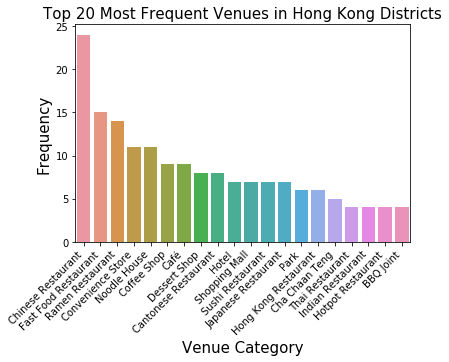

<Figure size 1296x504 with 0 Axes>

In [58]:
import seaborn as sns
from matplotlib import pyplot as plt

s=sns.barplot(x="Venue Category", y="Frequency", data=HK_venue_frequency)
s.set_xticklabels(s.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.title('Top 20 Most Frequent Venues in Hong Kong Districts', fontsize=15)
plt.xlabel("Venue Category", fontsize=15)
plt.ylabel ("Frequency", fontsize=15)
plt.savefig("Most_Freq_Venues1.png", dpi=300)
fig = plt.figure(figsize=(18,7))
plt.show()

In [60]:
# one hot encoding
HK_onehot = pd.get_dummies(HK_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
HK_onehot['District'] = HK_venues['District'] 

# move neighborhood column to the first column
fixed_columns = [HK_onehot.columns[-1]] + list(HK_onehot.columns[:-1])
HK_onehot = HK_onehot[fixed_columns]

HK_onehot.head(15)


,District,Arcade,Art Gallery,Art Museum,Asian Restaurant,BBQ Joint,Bakery,Bar,Beach,Bed & Breakfast,...,Track,Trail,Train Station,Tram Station,Tunnel,Udon Restaurant,Video Store,Vietnamese Restaurant,Waterfall,Yoshoku Restaurant
0,Central and Western,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,Central and Western,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Central and Western,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Central and Western,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Central and Western,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Central and Western,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Central and Western,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Central and Western,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,Central and Western,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,Central and Western,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
HK_grouped = HK_onehot.groupby('District').mean().reset_index()
HK_grouped

,District,Arcade,Art Gallery,Art Museum,Asian Restaurant,BBQ Joint,Bakery,Bar,Beach,Bed & Breakfast,...,Track,Trail,Train Station,Tram Station,Tunnel,Udon Restaurant,Video Store,Vietnamese Restaurant,Waterfall,Yoshoku Restaurant
0,Central and Western,0.000000,0.038462,0.038462,0.038462,0.000000,0.038462,0.000000,0.0,0.000000,...,0.000000,0.038462,0.000000,0.038462,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Eastern,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Islands,0.025641,0.000000,0.000000,0.000000,0.025641,0.000000,0.025641,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.025641,0.000000,0.000000,0.000000,0.025641
3,Kowloon City,0.000000,0.055556,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Kwai Tsing,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000
5,Kwun Tong,0.000000,0.022727,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,North,0.019231,0.000000,0.000000,0.000000,0.038462,0.019231,0.000000,0.0,0.019231,...,0.000000,0.000000,0.000000,0.000000,0.019231,0.000000,0.019231,0.000000,0.019231,0.000000
7,Sha Tin,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.071429,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,Sham Shui Po,0.000000,0.000000,0.000000,0.000000,0.016667,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.016667,0.000000,0.000000
9,Tsuen Wan,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.4,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [63]:
num_top_venues = 5

for hood in HK_grouped['District']:
    print("----"+hood+"----")
    temp = HK_grouped[HK_grouped['District'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Central and Western----
                venue  freq
0      Scenic Lookout  0.12
1      Ice Cream Shop  0.08
2           Gift Shop  0.08
3  Italian Restaurant  0.04
4    Sushi Restaurant  0.04


----Eastern----
            venue  freq
0        Bus Stop   1.0
1          Arcade   0.0
2       Pet Store   0.0
3  Scenic Lookout   0.0
4  Sandwich Place   0.0


----Islands----
                 venue  freq
0     Ramen Restaurant  0.13
1   Chinese Restaurant  0.05
2            Rock Club  0.05
3  Japanese Restaurant  0.05
4    Convenience Store  0.05


----Kowloon City----
                  venue  freq
0  Fast Food Restaurant  0.17
1    Chinese Restaurant  0.11
2                  Café  0.11
3                 Hotel  0.06
4    Dim Sum Restaurant  0.06


----Kwai Tsing----
                venue  freq
0   Korean Restaurant  0.25
1              Tunnel  0.25
2  Chinese Restaurant  0.25
3     Thai Restaurant  0.25
4              Arcade  0.00


----Kwun Tong----
                  venue  freq
0  Fast 

In [74]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [77]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['District']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
district_venues_sorted = pd.DataFrame(columns=columns)
district_venues_sorted['District'] = HK_grouped['District']

for ind in np.arange(HK_grouped.shape[0]):
    district_venues_sorted.iloc[ind, 1:] = return_most_common_venues(HK_grouped.iloc[ind, :], num_top_venues)

district_venues_sorted.head()

,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Central and Western,Scenic Lookout,Gift Shop,Ice Cream Shop,Italian Restaurant,Playground,Pizza Place,Coffee Shop,Seafood Restaurant,Noodle House,Fast Food Restaurant
1,Eastern,Bus Stop,Yoshoku Restaurant,Fried Chicken Joint,Dim Sum Restaurant,Donburi Restaurant,Dongbei Restaurant,Drugstore,Dumpling Restaurant,Electronics Store,Fast Food Restaurant
2,Islands,Ramen Restaurant,Rock Club,Chinese Restaurant,Convenience Store,Japanese Restaurant,Hobby Shop,Recording Studio,Park,Music Store,Movie Theater
3,Kowloon City,Fast Food Restaurant,Café,Chinese Restaurant,Seafood Restaurant,Supermarket,Cantonese Restaurant,Dim Sum Restaurant,Cha Chaan Teng,Park,Market
4,Kwai Tsing,Thai Restaurant,Tunnel,Korean Restaurant,Chinese Restaurant,Yoshoku Restaurant,Electronics Store,Food & Drink Shop,Flea Market,Fishing Store,Fast Food Restaurant


In [78]:
# set number of clusters
kclusters = 5

HK_grouped_clustering = HK_grouped.drop('District', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(HK_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 2, 4, 0, 3, 0, 4, 0, 0, 1], dtype=int32)

In [92]:
# add clustering labels
#district_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
HK_merged = df

# merge HK_grouped with HK_data to add latitude/longitude for each district
HK_merged = HK_merged.join(district_venues_sorted.set_index('District'), on='District')

HK_merged # check the last columns!

,District,Chinese,Population,Area km^2,Density /km^2,Region,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Central and Western,中西區,"244,600",12.44,"19,983.92",Hong Kong Island,22.274848,114.148725,0.0,Scenic Lookout,Gift Shop,Ice Cream Shop,Italian Restaurant,Playground,Pizza Place,Coffee Shop,Seafood Restaurant,Noodle House,Fast Food Restaurant
1,Eastern,東區,"574,500",18.56,"31,217.67",Hong Kong Island,22.273078,114.233594,2.0,Bus Stop,Yoshoku Restaurant,Fried Chicken Joint,Dim Sum Restaurant,Donburi Restaurant,Dongbei Restaurant,Drugstore,Dumpling Restaurant,Electronics Store,Fast Food Restaurant
2,Southern,南區,"269,200",38.85,"6,962.68",Hong Kong Island,22.219263,114.225230,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Wan Chai,灣仔區,"150,900",9.83,"15,300.10",Hong Kong Island,22.273947,114.181749,0.0,Coffee Shop,Sushi Restaurant,Sports Club,Cantonese Restaurant,Chinese Restaurant,Hotel,Szechuan Restaurant,Racecourse,Pizza Place,Restaurant
4,Sham Shui Po,深水埗區,"390,600",9.35,"41,529.41",Kowloon,22.331254,114.159321,0.0,Noodle House,Chinese Restaurant,Dessert Shop,Shopping Mall,Fast Food Restaurant,Cha Chaan Teng,Italian Restaurant,Ramen Restaurant,Sushi Restaurant,Snack Place
5,Kowloon City,九龍城區,"405,400",10.02,"40,194.70",Kowloon,22.321800,114.188594,0.0,Fast Food Restaurant,Café,Chinese Restaurant,Seafood Restaurant,Supermarket,Cantonese Restaurant,Dim Sum Restaurant,Cha Chaan Teng,Park,Market
6,Kwun Tong,觀塘區,"641,100",11.27,"56,779.05",Kowloon,22.308649,114.227661,0.0,Fast Food Restaurant,Coffee Shop,Chinese Restaurant,Hong Kong Restaurant,Shopping Mall,Café,Pool,Electronics Store,Department Store,Sports Bar
7,Wong Tai Sin,黃大仙區,"426,200",9.30,"45,645.16",Kowloon,22.344322,114.202150,0.0,Fast Food Restaurant,Multiplex,Vietnamese Restaurant,Park,Ice Cream Shop,Coffee Shop,Taiwanese Restaurant,Shopping Mall,Noodle House,Chinese Restaurant
8,Yau Tsim Mong,油尖旺區,"318,100",6.99,"44,864.09",Kowloon,22.307404,114.165526,0.0,Chinese Restaurant,Sandwich Place,Indian Restaurant,Café,Dessert Shop,Clothing Store,Market,Park,Seafood Restaurant,Shaanxi Restaurant
9,Islands,離島區,"146,900",175.12,825.14,New Territories,35.736156,139.714222,4.0,Ramen Restaurant,Rock Club,Chinese Restaurant,Convenience Store,Japanese Restaurant,Hobby Shop,Recording Studio,Park,Music Store,Movie Theater


In [93]:
#drop NaN rows
HK_merged=HK_merged.drop([HK_merged.index[2],HK_merged.index[12],HK_merged.index[14],HK_merged.index[16],HK_merged.index[17]])
HK_merged

,District,Chinese,Population,Area km^2,Density /km^2,Region,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Central and Western,中西區,"244,600",12.44,"19,983.92",Hong Kong Island,22.274848,114.148725,0.0,Scenic Lookout,Gift Shop,Ice Cream Shop,Italian Restaurant,Playground,Pizza Place,Coffee Shop,Seafood Restaurant,Noodle House,Fast Food Restaurant
1,Eastern,東區,"574,500",18.56,"31,217.67",Hong Kong Island,22.273078,114.233594,2.0,Bus Stop,Yoshoku Restaurant,Fried Chicken Joint,Dim Sum Restaurant,Donburi Restaurant,Dongbei Restaurant,Drugstore,Dumpling Restaurant,Electronics Store,Fast Food Restaurant
3,Wan Chai,灣仔區,"150,900",9.83,"15,300.10",Hong Kong Island,22.273947,114.181749,0.0,Coffee Shop,Sushi Restaurant,Sports Club,Cantonese Restaurant,Chinese Restaurant,Hotel,Szechuan Restaurant,Racecourse,Pizza Place,Restaurant
4,Sham Shui Po,深水埗區,"390,600",9.35,"41,529.41",Kowloon,22.331254,114.159321,0.0,Noodle House,Chinese Restaurant,Dessert Shop,Shopping Mall,Fast Food Restaurant,Cha Chaan Teng,Italian Restaurant,Ramen Restaurant,Sushi Restaurant,Snack Place
5,Kowloon City,九龍城區,"405,400",10.02,"40,194.70",Kowloon,22.321800,114.188594,0.0,Fast Food Restaurant,Café,Chinese Restaurant,Seafood Restaurant,Supermarket,Cantonese Restaurant,Dim Sum Restaurant,Cha Chaan Teng,Park,Market
6,Kwun Tong,觀塘區,"641,100",11.27,"56,779.05",Kowloon,22.308649,114.227661,0.0,Fast Food Restaurant,Coffee Shop,Chinese Restaurant,Hong Kong Restaurant,Shopping Mall,Café,Pool,Electronics Store,Department Store,Sports Bar
7,Wong Tai Sin,黃大仙區,"426,200",9.30,"45,645.16",Kowloon,22.344322,114.202150,0.0,Fast Food Restaurant,Multiplex,Vietnamese Restaurant,Park,Ice Cream Shop,Coffee Shop,Taiwanese Restaurant,Shopping Mall,Noodle House,Chinese Restaurant
8,Yau Tsim Mong,油尖旺區,"318,100",6.99,"44,864.09",Kowloon,22.307404,114.165526,0.0,Chinese Restaurant,Sandwich Place,Indian Restaurant,Café,Dessert Shop,Clothing Store,Market,Park,Seafood Restaurant,Shaanxi Restaurant
9,Islands,離島區,"146,900",175.12,825.14,New Territories,35.736156,139.714222,4.0,Ramen Restaurant,Rock Club,Chinese Restaurant,Convenience Store,Japanese Restaurant,Hobby Shop,Recording Studio,Park,Music Store,Movie Theater
10,Kwai Tsing,葵青區,"507,100",23.34,"21,503.86",New Territories,22.341007,114.104285,3.0,Thai Restaurant,Tunnel,Korean Restaurant,Chinese Restaurant,Yoshoku Restaurant,Electronics Store,Food & Drink Shop,Flea Market,Fishing Store,Fast Food Restaurant


In [99]:
HK_merged['Cluster Labels']=HK_merged['Cluster Labels'].astype(np.int64)
print (HK_merged['Cluster Labels'])

0     0
1     2
3     0
4     0
5     0
6     0
7     0
8     0
9     4
10    3
11    4
13    0
15    1
Name: Cluster Labels, dtype: int64


In [100]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(HK_merged['Latitude'], HK_merged['Longitude'], HK_merged['District'], HK_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters